<a href="https://colab.research.google.com/github/wildemberg-sales/DL-Handwritten/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning para identificação de números manuscritros a partir da da base de dados MNIST

In [1]:
#!pip install -q -U tensorflow
#!pip install -q -U keras
#!pip install -q -U numpy
#!pip install -q -U pandas
!pip install -q -U tensorflow-addons
!pip install -q -U keras-utils
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=c3af63d4d9b6cae6b80708c80a6f8253025eb05f73db1faa33a5aad8f73a5936
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.metrics import *

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print(y_train[0])


5


Text(0.5, 1.0, '5')

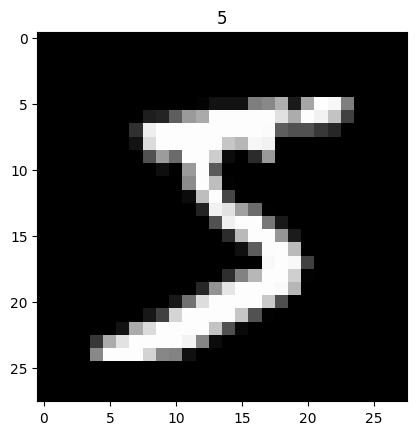

In [6]:
# Verificando como é a imagem
plt.imshow(X_train[0], cmap = 'gray')
plt.title(str(y_train[0]))


In [7]:
# redimensiona o formato para ser compatível com o que o modelo precisa
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [8]:
# Verificando o formato que ficaram os dados
print(X_train.shape) # (60000, 28, 28, 1) são 60000 imagens, de 28x28 pixels, e um canal de cor (preto e branco)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# Converte cada pixel da imagem para um tipo mais fácil de ser processado
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [10]:
# Normalização dos dados
X_train /= 255
X_test /= 255


In [11]:
print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [12]:
# Criando um modelo de categorização dos meus dados a partir do seu resultado
# No total são 10 classes que vão de 0 a 5
n_classes = tf.keras.utils.to_categorical(y_train, 10)
print(n_classes)
print(y_train[0])
print(n_classes[0])


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Repetindo para os dados de teste
n_classes_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
# Definição da arquitetura do modelo
model = Sequential()
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 input_shape = (28, 28, 1), # 28x28 pixels com um canal de cor
                 activation = 'relu'))
model.add(BatchNormalization()) # Polimento dos dados usando normalização
model.add(MaxPooling2D(pool_size = (2, 2))) # reduz a dimensão dos mapas de características
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# fim da alimentação do modelo e extração de características
# Ínicio do treinamento do modelo
model.add(Flatten()) #achatamento para a próxima camada para encontrar os melhores pesos
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       147712    
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         590080    
                                                                 
 batch_normalization_1 (Bat  (None, 9, 9, 256)         1

In [15]:
# Definição das métricas que serão utilizadas para acompanhar o modelo
METRICS = [CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                                    name = 'specificity'),
           Recall(name='recall')]


In [16]:
# Compilação do Modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = METRICS)

In [17]:
# Aumento sintético da base de dados
# Cria novas imagens baseadas na existente aplicando alterações
gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

# aqui ela decide as alterações arbitrariamente
gerador_teste = ImageDataGenerator()

X_train = gerador_treinamento.flow(X_train,
                                   n_classes,
                                   batch_size = 128)

X_test = gerador_teste.flow(X_test,
                            n_classes_test,
                            batch_size = 128)


In [18]:
hist = model.fit_generator(X_train,
                           steps_per_epoch = 60000 / 128,
                           epochs = 100,
                           validation_data = X_test,
                           validation_steps = 10000 / 128)


Epoch 1/100


<ipython-input-18-ace0db55ed34>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(X_train,


468/468 [==============================] - 45s 59ms/step - loss: 0.2987 - accuracy: 0.9068 - tp: 53180.0000 - tn: 536290.0000 - fp: 3710.0000 - fn: 6820.0000 - precision: 0.9963 - sensitivity: 0.9941 - specificity: 0.9998 - recall: 0.8863 - val_loss: 0.3434 - val_accuracy: 0.9036 - val_tp: 8943.0000 - val_tn: 89145.0000 - val_fp: 855.0000 - val_fn: 1057.0000 - val_precision: 0.9790 - val_sensitivity: 0.9858 - val_specificity: 0.9987 - val_recall: 0.8943
Epoch 2/100
468/468 [==============================] - 23s 49ms/step - loss: 0.1238 - accuracy: 0.9630 - tp: 57457.0000 - tn: 538216.0000 - fp: 1784.0000 - fn: 2543.0000 - precision: 0.9980 - sensitivity: 0.9966 - specificity: 0.9998 - recall: 0.9576 - val_loss: 0.0685 - val_accuracy: 0.9778 - val_tp: 9750.0000 - val_tn: 89816.0000 - val_fp: 184.0000 - val_fn: 250.0000 - val_precision: 0.9995 - val_sensitivity: 0.9989 - val_specificity: 1.0000 - val_recall: 0.9750
Epoch 3/100
468/468 [==============================] - 23s 49ms/step - lo

KeyboardInterrupt: 

In [ ]:
acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]


In [ ]:
accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{tpU10}] [{fpU10}]")
print(f"[{fnU10}] [{tnU10}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


In [ ]:
TPR = TP /(TP + FN)
TNR = TN /(TN + FP)
PPV = TP /(TP + FP)
NPV = TN /(TN + FN)
FPR = FP /(FP + TN)
FNR = FN /(TP + FN)
FDR = FP /(TP + FP)

OACC = (TP + TN) /(TP + FP + FN + TN)
ACCCM = (TP + TN) / (TP + TN + FP + FN)
FM = (2 * PRE * REC) / (PRE + REC)
F1S = 2*((PRE * REC) / (PRE + REC))
F1S2 = 2 * TP / (2 * TP + FP + FN)


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


In [ ]:
data = {'Verdadeiros Positivos':tpU10,
        'Verdadeiros Negativos':tnU10,
        'Falsos Positivos':fpU10,
        'Falsos Netagivos':fnU10}

modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]
acc_final = hist.history['accuracy'][-1] * 100


In [ ]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
# print(f'Taxa de Aprendizado: {round(learning_rate,2)*100}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')
